In [1]:
import autograd.numpy as np
import numpy as npb
import scipy.integrate as spi
import pandas as pd
import scipy.interpolate as spip
import scipy.optimize as spo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import diffusion_maps as dmaps
import autograd
import scipy.stats as sps
#import sdeint as sd
sns.set_context('notebook')
sns.set_style('ticks')
mag = plt.get_cmap("viridis")
import scipy.spatial as spsp
import sys

import sklearn.gaussian_process as skgp
#import semi_sup_learn as ssl
import torch
import sklearn.neighbors as sknn
blue = sns.color_palette()[0]
green = sns.color_palette()[1]
red = sns.color_palette()[2]
%matplotlib notebook
seed = 20
np.random.seed(seed=seed)

In [2]:

Data = np.loadtxt('data/idv8/y.dat')[:,0:19]
Data2 = np.loadtxt('data/idv8/u.dat')[:,0:11]
Data = np.hstack([Data, Data2])
# identify and remove variables with negligible variance
var = np.std(Data, axis=0)**2 
Data = Data[:,var>1e-5]
nvar = np.shape(Data)[1]
Data = sps.zscore(Data)
#Data = Data[:,(np.arange(len(Data.T)) != 27)]
#Data = Data[:,(np.arange(len(Data.T)) != 23)]

In [3]:
from tslearn.clustering import TimeSeriesKMeans


In [44]:
n_groups = 10
dba_km = TimeSeriesKMeans(n_clusters=n_groups, n_init=5, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
group_inds = dba_km.fit_predict(Data.T)

Init 1
17.142 --> 9.633 --> 9.631 --> 9.631 --> 
Init 3
13.525 --> 7.835 --> 7.833 --> 7.833 --> 
Init 5
13.860 --> 7.562 --> 7.339 --> 7.339 --> 


In [43]:

group_inds

Init 1


KeyboardInterrupt: 

In [59]:
np.mean(Data,axis=0)

<IPython.core.display.Javascript object>


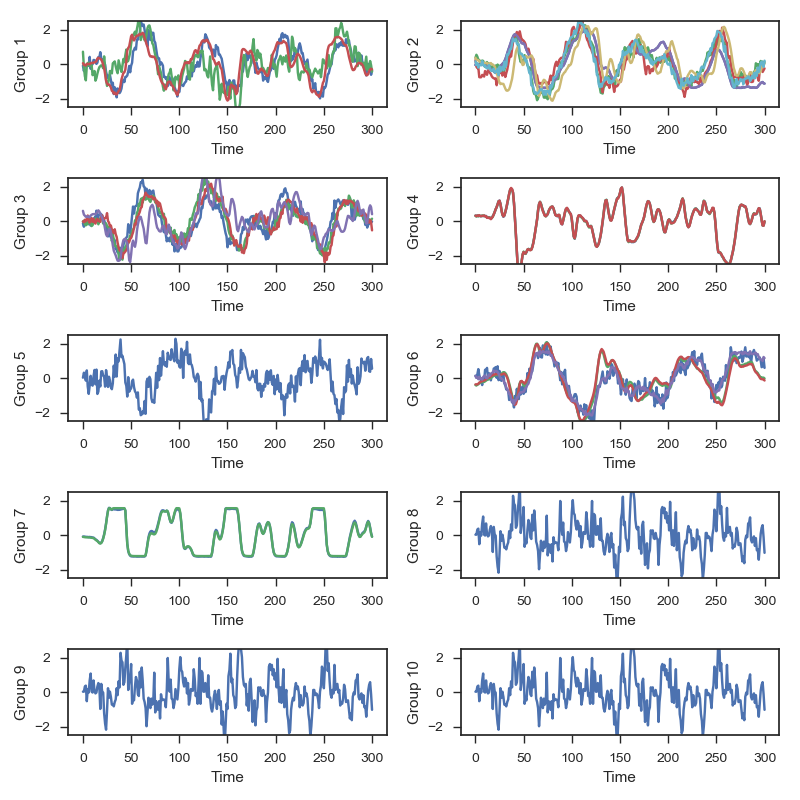

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(521)
plt.plot(Data[:,group_inds==0])
plt.xlabel('Time')
plt.ylabel('Group 1')
plt.ylim([-2.5,2.5])
plt.subplot(522)
plt.plot(Data[:,group_inds==1])
plt.xlabel('Time')
plt.ylabel('Group 2')
plt.ylim([-2.5,2.5])
plt.subplot(523)
plt.plot(Data[:,group_inds==2])
plt.xlabel('Time')
plt.ylabel('Group 3')
plt.ylim([-2.5,2.5])
plt.subplot(524)
plt.plot(Data[:,group_inds==3])
plt.xlabel('Time')
plt.ylabel('Group 4')
plt.ylim([-2.5,2.5])
plt.subplot(525)
plt.plot(Data[:,group_inds==4])
plt.xlabel('Time')
plt.ylabel('Group 5')
plt.ylim([-2.5,2.5])
plt.subplot(526)
plt.plot(Data[:,group_inds==5])
plt.xlabel('Time')
plt.ylabel('Group 6')
plt.ylim([-2.5,2.5])
plt.subplot(527)
plt.plot(Data[:,group_inds==6])
plt.xlabel('Time')
plt.ylabel('Group 7')
plt.ylim([-2.5,2.5])
plt.subplot(528)
plt.plot(Data[:,group_inds==7])
plt.xlabel('Time')
plt.ylabel('Group 8')
plt.ylim([-2.5,2.5])
plt.subplot(529)
plt.plot(Data[:,group_inds==7])
plt.xlabel('Time')
plt.ylabel('Group 9')
plt.ylim([-2.5,2.5])
plt.subplot(5,2,10)
plt.plot(Data[:,group_inds==7])
plt.xlabel('Time')
plt.ylabel('Group 10')
plt.ylim([-2.5,2.5])
plt.tight_layout()

<IPython.core.display.Javascript object>


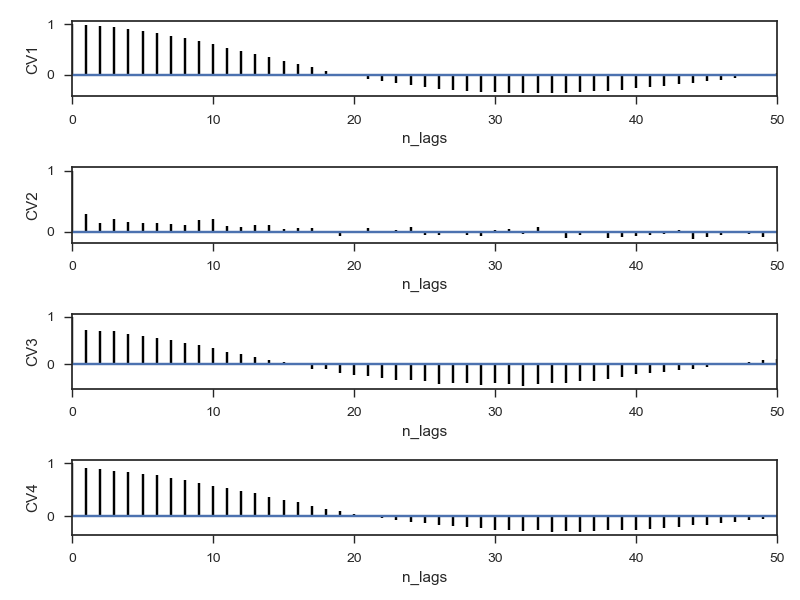

In [32]:
plt.figure(figsize=(8,6))
plt.subplot(411)
plt.acorr(Data.T[0],maxlags=50)
plt.xlabel('n_lags')
plt.ylabel('CV1')
plt.xlim([0,50])
plt.subplot(412)
plt.acorr(Data.T[1],maxlags=50)
plt.xlabel('n_lags')
plt.ylabel('CV2')
plt.xlim([0,50])
plt.subplot(413)
plt.acorr(Data.T[2],maxlags=50)
plt.xlabel('n_lags')
plt.ylabel('CV3')
plt.xlim([0,50])
plt.subplot(414)
plt.acorr(Data.T[3],maxlags=50)
plt.xlabel('n_lags')
plt.ylabel('CV4')
plt.xlim([0,50])
plt.tight_layout()

In [71]:
n_lags = 5
n_points = len(Data)-n_lags
vector = np.flip(np.arange(n_lags))
CVlags =  np.zeros((len(Data)-n_lags,n_lags,len(Data.T)))
n_var = len(Data.T)
t = np.zeros((len(Data)-n_lags))
CVcurr = np.zeros((len(Data)-n_lags,len(Data.T)))
for i in range(len(Data)-n_lags):
    for j in range(len(Data.T)):
        CVlags[i,:,j] = Data[i+vector,j]
    t[i] = i+vector[0]+1
    CVcurr[i] = Data[i+vector[0]+1]
CVlags_tall = CVlags.reshape(len(CVlags),len(CVlags[0,:,0])*len(CVlags[0,0,:]))
def get_tall(idx):
    # get lags of all variables except variable[idx] in tall format
    
    return CVlags[:,:,np.arange(n_var)!=idx].reshape(len(CVlags),len(CVlags[0,:,0])*(len(CVlags[0,0,:])-1))


In [60]:
def get_group_curr(idx):
    return CV_curr[:,group_inds==i]

def get_tall_group_lags_missing(gidx):
    # get lags of all variables EXCEPT those in group gidx in tall format 
    return CVlags[:,:,group_inds!=gidx].reshape(len(CVlags),
                                                len(CVlags[0,:,0])*(len(CVlags[0,0,:])-sum(group_inds==gidx)))

15.636081806372891


<IPython.core.display.Javascript object>


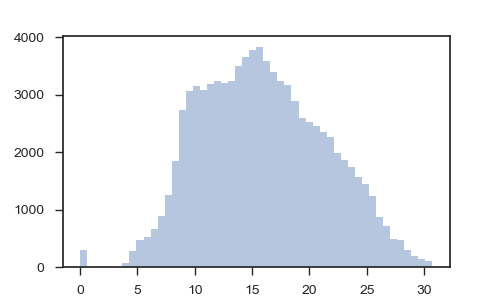

/home/robert/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/robert/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[15.37429006 15.28061443 15.34160977 15.35435705 15.35875547 15.34696427
 15.29873079 15.34272235 15.33282691 15.28643893 15.40320814 15.36159564
 15.30098426 15.32242417 15.3885501  15.29881256 15.3220089  15.4090011
 15.40780258 15.2822327  15.3682824  15.37406054 15.36102483 15.28895696
 15.33592561 15.31978365 15.29326985 15.41558718]
[14.62134436 14.02522461 14.45130753 14.57575508 15.34272235 14.56415706
 14.95129433 15.33282691 15.28061443 14.71867835]


In [61]:
dist = spsp.distance.squareform(spsp.distance.pdist(CVlags_tall,'euclidean'))
eps = np.median(dist)
print(eps)
plt.figure(figsize=(5,3))
sns.distplot(dist.flatten(),kde=False)

epsm = np.zeros(n_var)
for i in range(n_var):
    dist = spsp.distance.squareform(spsp.distance.pdist(get_tall(i),'euclidean'))
    epsm[i] = np.median(dist)
print(epsm)
    
epsmg = np.zeros(n_groups)
for i in range(n_groups):
    dist = spsp.distance.squareform(spsp.distance.pdist(get_tall_group_lags_missing(i),'euclidean'))
    epsmg[i] = np.median(dist)
print(epsmg)

In [64]:
n_eig=9
dm_lags = dmaps.diffusion_maps.DiffusionMaps(CVlags_tall,
                                        eps,
                                        cut_off=eps*100,
                                        use_cuda = False,
                                        num_eigenpairs=n_eig+1,
                                        renormalization =1.,
                                        normalize_kernel=True,
                                        pnorm=2,)
print('DMAPS Eigenvalues All Lags: ', dm_lags.eigenvalues)
dm_lags.eigenvectors=np.real(dm_lags.eigenvectors)
resid = dm_lags.residuals(3)
print('Normalized Residuals All Lags: ', resid)
dm_lagsm = []
for i in range(n_var):
    dm_lagsm  = dm_lagsm + [dmaps.diffusion_maps.DiffusionMaps(get_tall(i),
                                                               epsm[i],
                                                               cut_off=epsm[i]*100,
                                                               use_cuda = False,
                                                               num_eigenpairs=n_eig+1,
                                                               renormalization =1.,
                                                               normalize_kernel=True,
                                                               pnorm=2,)]
    
dm_lagsmg = []
for i in range(n_groups):
    dm_lagsmg  = dm_lagsmg + [dmaps.diffusion_maps.DiffusionMaps(get_tall_group_lags_missing(i),
                                                                 epsmg[i],
                                                                 cut_off=epsmg[i]*100,
                                                                 use_cuda = False,
                                                                 num_eigenpairs=n_eig+1,
                                                                 renormalization =1.,
                                                                 normalize_kernel=True,
                                                                 pnorm=2,)]




DMAPS Eigenvalues All Lags:  [1.        +0.j 0.94986068+0.j 0.94330162+0.j 0.93117572+0.j
 0.88951046+0.j 0.85317091+0.j 0.83739488+0.j 0.82398418+0.j
 0.793256  +0.j 0.76408156+0.j]


/home/robert/anaconda3/lib/python3.6/site-packages/diffusion_maps-20170616.10-py3.6.egg/diffusion_maps/diffusion_maps.py:384: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Normalized Residuals All Lags:  [0.         1.         0.98206404 0.40889295 0.0462438  0.04331394
 0.09894749 0.12010321 0.05178532 0.0467817 ]


In [73]:
feats = sps.zscore(dm_lags.eigenvectors[1:].T)
len(feats.T)

9

In [74]:
feats = sps.zscore(dm_lags.eigenvectors[1:].T)
featsm = np.zeros((n_points,n_eig,n_var))
featsmg = np.zeros((n_points,n_eig,n_groups))
for i in range(n_var):
    featsm[:,:,i] = sps.zscore(np.real(dm_lagsm[i].eigenvectors[1:].T))
for i in range(n_groups):
    featsmg[:,:,i] = sps.zscore(np.real(dm_lagsmg[i].eigenvectors[1:].T))

In [76]:
np.shape(featsmg)

(296, 9, 10)

In [77]:
from sklearn.metrics import mutual_info_score

<IPython.core.display.Javascript object>


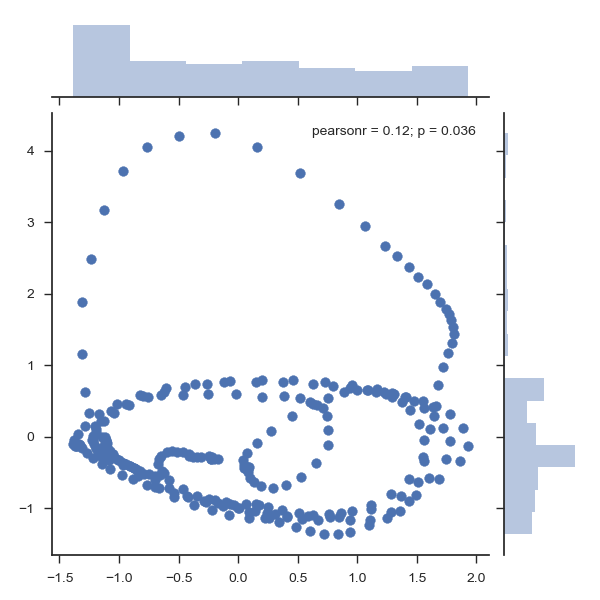

0.555409465967997


/home/robert/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/robert/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/robert/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [78]:
for i in range(n_eig):
    for j in range(n_var):
        hist = np.histogram2d(feats[:,i], featsm[:,0,j])[0]
m = mutual_info_score(None,None,contingency = hist)
sns.jointplot(feats[:,0],feats[:,1])
print(m)


In [79]:
from sklearn.linear_model import RidgeCV


In [83]:
model = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False,cv=10).fit(feats,CVcurr)
modelm = []
for i in range(n_var):
    modelm = modelm + [RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False,cv=10).fit(featsm[:,:,i],CVcurr)]
modelmg = []
for i in range(n_groups):
    modelmg = modelmg + [RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False,cv=10).fit(featsmg[:,:,i],CVcurr)]

In [85]:
print(model.alpha_, modelm[1].alpha_, modelmg[1].alpha_)

15.998587196060573 15.998587196060573 23.29951810515367


In [96]:
np.shape(modelmg[i].predict(featsmg[:,:,i]))
#np.shape(CVcurr)

(296, 28)

In [112]:


resid = CVcurr - model.predict(feats)#feats @ np.linalg.pinv(feats) @ CVcurr
var_resid = np.var(resid,axis=0)
residm = np.zeros((n_points,n_var,n_var))
var_residm = np.zeros((n_var,n_var))
for i in range(n_var):
    residm[:,:,i] = CVcurr - modelm[i].predict(featsm[:,:,i])#featsm1 @ np.linalg.pinv(featsm1) @ CVcurr
    var_residm[:,i] = np.var(residm[:,:,i],axis=0)

sum_var_group = np.zeros(n_groups)
for i in range(n_groups):
    sum_var_group[i] = sum(var_resid[group_inds==i])

residmg = np.zeros((n_points,n_var,n_groups))
var_residmg = np.zeros((n_var,n_groups))
for i in range(n_groups):
    residmg[:,:,i] = CVcurr - modelmg[i].predict(featsmg[:,:,i])
    var_residmg[:,i] = np.var(residmg[:,:,i],axis=0)

sum_var_group_mg = np.zeros((n_groups,n_groups)) # sum of variance of predicting group i when group j is missing
for i in range(n_groups):
    for j in range(n_groups):
        sum_var_group_mg[i,j] = sum(var_residmg[group_inds==i,j])    
    


In [119]:
F = np.zeros((n_var,n_var))
for i in range(n_var): # rows are predicting CV[row]
    for j in range(n_var): # columns are missing CVlags[column]
        F[i,j] = var_residm[i,j]/var_resid[i]

F_group = np.zeros((n_groups,n_groups))
for i in range(n_groups): # rows are predicting CV[row]
    for j in range(n_groups): # columns are missing CVlags[column]
        F_group[i,j] = sum_var_group_mg[i,j]/sum_var_group[i]

In [121]:

f_crit = sps.f.ppf(.9,n_points,n_points)

<IPython.core.display.Javascript object>


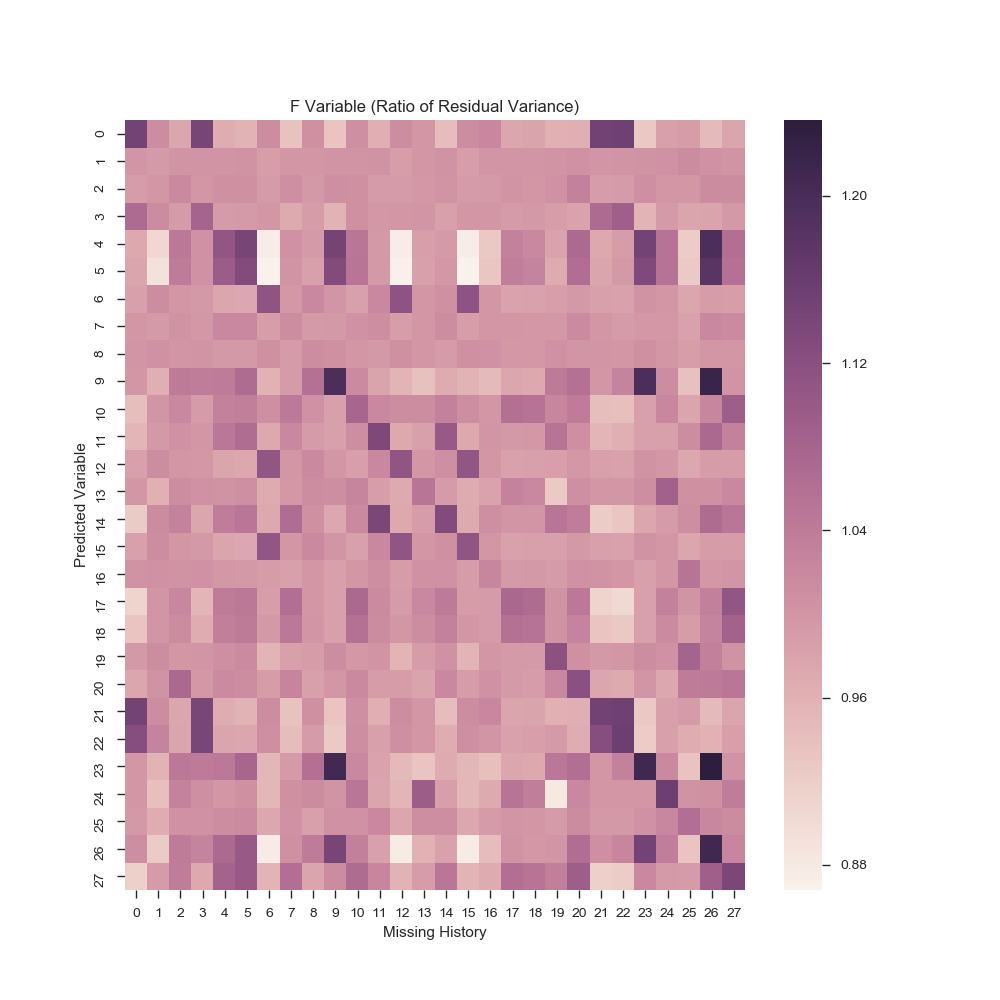

<IPython.core.display.Javascript object>


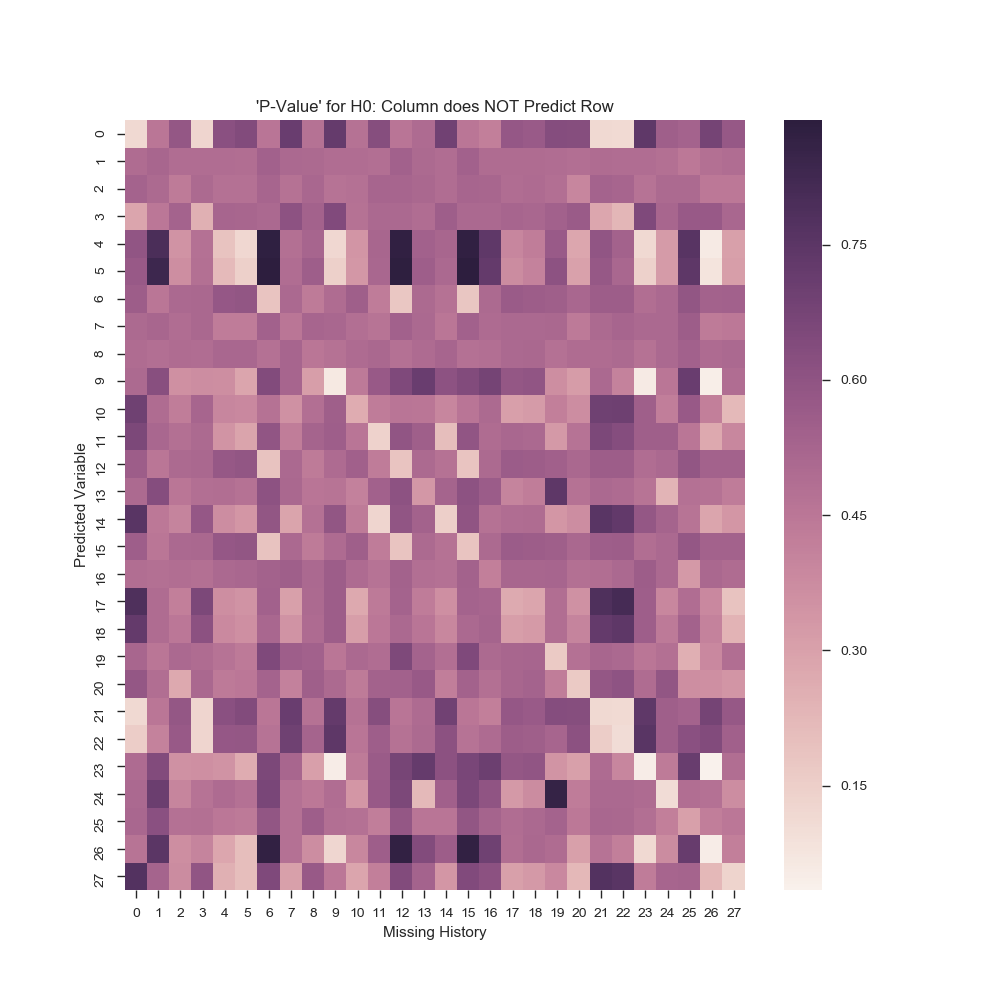

Text(0,0.5,'Predicted Variable')

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(F,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('F Variable (Ratio of Residual Variance)')
plt.xlabel('Missing History')
plt.ylabel('Predicted Variable')
#F
p_value = 1-sps.f.cdf(F, len(CVcurr), len(CVcurr))


plt.figure(figsize=(10,10))
sns.heatmap(p_value,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('\'P-Value\' for H0: Column does NOT Predict Row')
plt.xlabel('Missing History')
plt.ylabel('Predicted Variable')

<IPython.core.display.Javascript object>


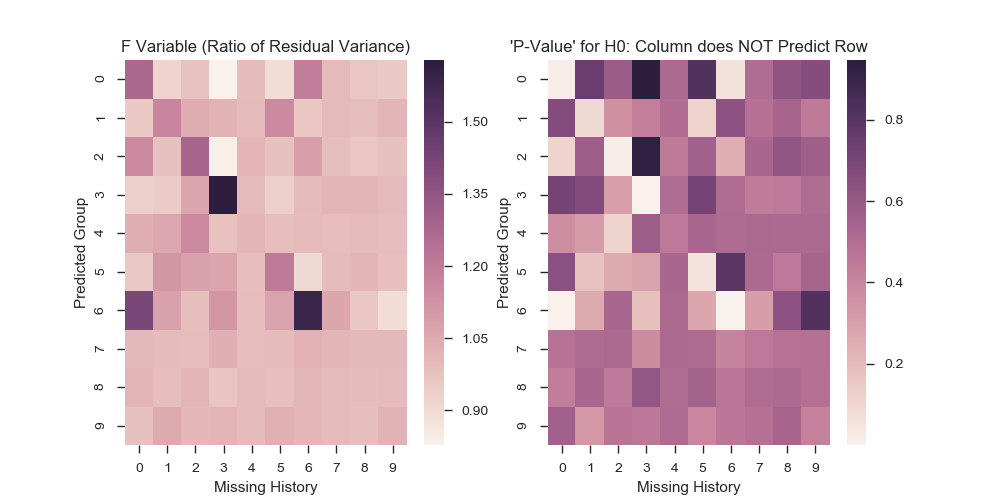

Text(0,0.5,'Predicted Group')

In [126]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.heatmap(F_group,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('F Variable (Ratio of Residual Variance)')
plt.xlabel('Missing History')
plt.ylabel('Predicted Group')
#F
p_value = 1-sps.f.cdf(F_group, len(CVcurr), len(CVcurr))


plt.subplot(122)
sns.heatmap(p_value,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('\'P-Value\' for H0: Column does NOT Predict Row')
plt.xlabel('Missing History')
plt.ylabel('Predicted Group')

<IPython.core.display.Javascript object>


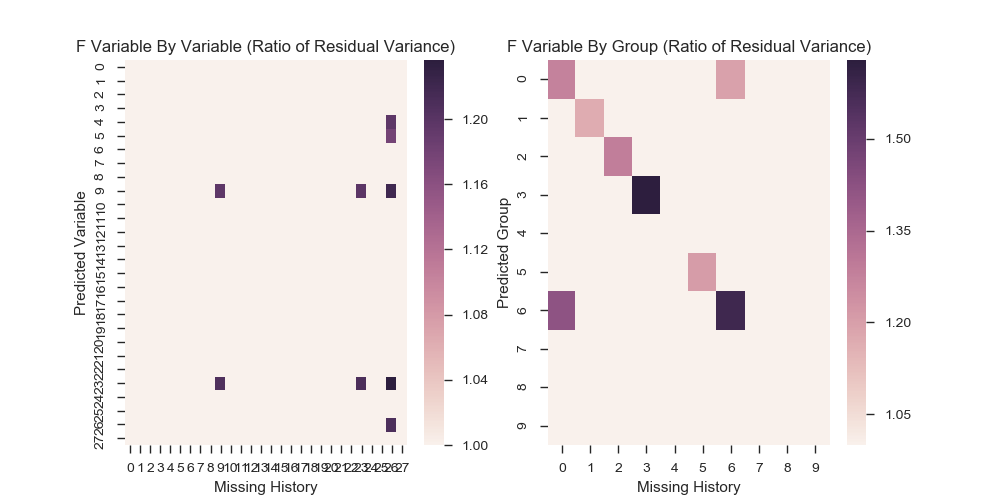

Text(0,0.5,'Predicted Group')

In [128]:
F_sig = F.copy()
threshold_inds = F<f_crit
F_sig[threshold_inds] = 1

F_sig_group = F_group.copy()
threshold_inds = F_group<f_crit
F_sig_group[threshold_inds] = 1

plt.figure(figsize=(10,5))

plt.subplot(121)
sns.heatmap(F_sig,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('F Variable By Variable (Ratio of Residual Variance)')
plt.xlabel('Missing History')
plt.ylabel('Predicted Variable')

plt.subplot(122)
sns.heatmap(F_sig_group,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('F Variable By Group (Ratio of Residual Variance)')
plt.xlabel('Missing History')
plt.ylabel('Predicted Group')

In [130]:
group_inds[23]

6

In [ ]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,CVcurr.T[3])
plt.plot(t,CVcurr.T[25])
plt.plot(t,feats.T[0])

In [ ]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,feats.T[0])
plt.plot(t,feats.T[1])
plt.plot(t,feats.T[2])




plt.subplot(2,1,2)
plt.plot(t,featsm[:,0,24])
plt.plot(t,featsm[:,1,15])
plt.plot(t,featsm[:,2,15])



In [ ]:
# New approach: predict dmaps eigenvectors of FULL (CVlags_tall)
# from dmaps eigenvectors of CVlagsm (get_tall function)
pred_dm = []
for i in range(len(epsm)):
    pred_dm = pred_dm + [RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(featsm[0:200,:,i],feats[0:200])]



In [ ]:

resid_pred_dm = np.zeros((len(feats[201::]),len(feats.T),len(epsm)))
var_resid_pred_dm = np.zeros((len(feats.T),len(epsm)))
for i in range(len(epsm)):
    resid_pred_dm[:,:,i] = feats[201::] - pred_dm[i].predict(featsm[201::,:,i])#featsm1 @ np.linalg.pinv(featsm1) @ CVcurr
    var_resid_pred_dm[:,i] = np.var(resid_pred_dm[:,:,i],axis=0)


#var_resid = np.var(resid,axis=0)
#for i in range(len(epsm)):
#    var_resid[i] = 
#var_residm1 = np.var(residm1,axis=0)
#var_residm2 = np.var(residm2,axis=0)
#var_residm3 = np.var(residm3,axis=0)
#var_residm4 = np.var(residm4,axis=0)
#print(var_resid)
#print(var_residm3)


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(var_resid_pred_dm,
            #xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            #yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=False, fmt = '.2f')
plt.title('MSE')
plt.xlabel('Missing History')
plt.ylabel('Predicted Eigenvector')
#F


In [ ]:
plt.figure()
plt.scatter(dm_lags.eigenvectors[1],dm_lags.eigenvectors[4],c=t,cmap=mag)

In [ ]:
import networkx as nx
import matplotlib as mpl
G = nx.from_numpy_matrix(F_sig)
plt.figure()
pos = nx.layout.spring_layout(G)
node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
#for i in range(M):
#    edges[i].set_alpha(edge_alphas[i])

#pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
#pc.set_array(edge_colors)
#plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()

In [ ]:
model = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(CVlags[0:500],CVcurr[0:500])
modelm1 = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(CVlagsm1[0:500],CVcurr[0:500])
modelm2 = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(CVlagsm2[0:500],CVcurr[0:500])
modelm3 = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(CVlagsm3[0:500],CVcurr[0:500])
modelm4 = RidgeCV(alphas=np.logspace(-5,3),fit_intercept=False).fit(CVlagsm4[0:500],CVcurr[0:500])

In [ ]:
print(model.alpha_, modelm1.alpha_, modelm2.alpha_, modelm3.alpha_, modelm4.alpha_)

In [ ]:
resid = CVcurr[501::] - model.predict(CVlags[501::])#CVlags @ np.linalg.pinv(CVlags) @ CVcurr
residm1 = CVcurr[501::] - modelm1.predict(CVlagsm1[501::])#CVlagsm1 @ np.linalg.pinv(CVlagsm1) @ CVcurr
residm2 = CVcurr[501::] - modelm2.predict(CVlagsm2[501::])#CVlagsm2 @ np.linalg.pinv(CVlagsm2) @ CVcurr
residm3 = CVcurr[501::] - modelm3.predict(CVlagsm3[501::])#CVlagsm3 @ np.linalg.pinv(CVlagsm3) @ CVcurr
residm4 = CVcurr[501::] - modelm4.predict(CVlagsm4[501::])#CVlagsm4 @ np.linalg.pinv(CVlagsm4) @ CVcurr



var_resid = np.var(resid,axis=0)
var_residm1 = np.var(residm1,axis=0)
var_residm2 = np.var(residm2,axis=0)
var_residm3 = np.var(residm3,axis=0)
var_residm4 = np.var(residm4,axis=0)
print(var_resid)
print(var_residm3)


In [ ]:
np.mean(resid**2)

In [ ]:
F = np.zeros((4,4))
for i in range(4): # rows are predicting CV[row]
    
    for j in range(4): # columns are missing CVlags[column]
        if j == 0:
            F[i,j] = var_residm1[i]/var_resid[i]
        if j == 1:
            F[i,j] = var_residm2[i]/var_resid[i]
        if j == 2:
            F[i,j] = var_residm3[i]/var_resid[i]
        if j == 3:
            F[i,j] = var_residm4[i]/var_resid[i]


In [ ]:
plt.figure()
sns.heatmap(F,
            xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=True, fmt = '.2f')
plt.title('F Variable (Ratio of Residual Variance)')
plt.xlabel('Missing History')
plt.ylabel('Predicted Variable')
F
p_value = 1-sps.f.cdf(F, len(CVcurr), len(CVcurr))
print(p_value)

plt.figure()
sns.heatmap(p_value,
            xticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            yticklabels=['CV1', 'CV2', 'CV3', 'CV4'],
            annot=True, fmt = '.2f')
plt.title('\'P-Value\' for H0: Column does NOT Predict Row')
plt.xlabel('Missing History')
plt.ylabel('Predicted Variable')